In [54]:
# !/usr/bin/env python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 1.Use case driven preprocessing
# import the data
file_path = 'D:/DA/melb_data11.csv'
df = pd.read_csv(file_path, header=0)
# check data dimensions
df.shape 

(13580, 11)

In [56]:
# check the first 3 rows of data
df.head(3)   # default 5

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Price
0,2,2.5,2,1,1.0,202,NaN,-37.7996,144.9984,Northern Metropolitan,1480000
1,2,2.5,2,1,0.0,156,79.0,-37.8079,144.9934,Northern Metropolitan,1035000
2,3,2.5,3,2,0.0,134,150.0,-37.8093,144.9944,Northern Metropolitan,1465000


In [57]:
# Attributes(including features and the target (class))
df.columns

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'Regionname', 'Price'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         13580 non-null  int64  
 1   Distance      13580 non-null  float64
 2   Bedroom2      13580 non-null  int64  
 3   Bathroom      13580 non-null  int64  
 4   Car           13518 non-null  float64
 5   Landsize      13580 non-null  int64  
 6   BuildingArea  7130 non-null   float64
 7   Lattitude     13580 non-null  float64
 8   Longtitude    13580 non-null  float64
 9   Regionname    13580 non-null  object 
 10  Price         13580 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 1.1+ MB


In [49]:
# null data and rate
# df.isnull().sum().sort_values(ascending=False)   #df.isnull().any(axis=0).sum()  4

In [59]:
na_count = df.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(4)      

,count,ratio
BuildingArea,6450,0.474963
Car,62,0.004566
Price,0,0.000000
Regionname,0,0.000000


In [60]:
# the target (class)
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002999524FB08>,
      dtype=object)

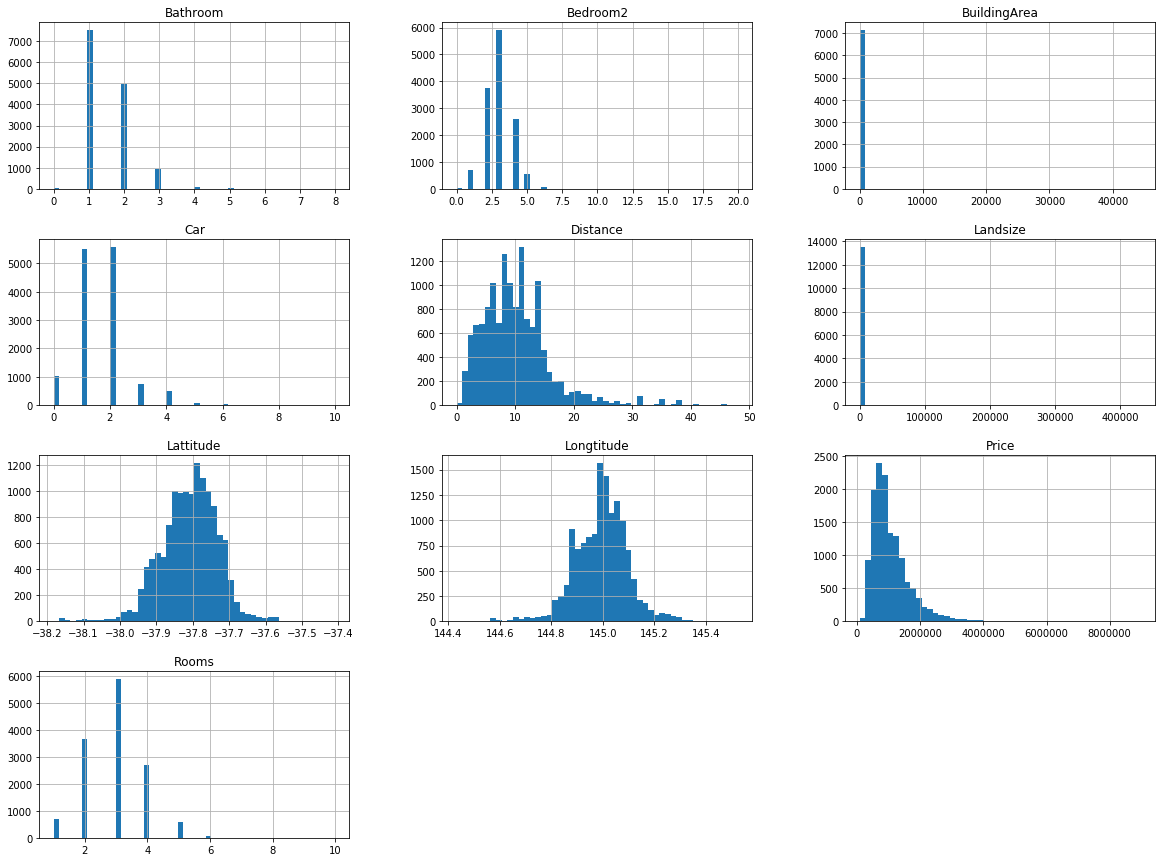

In [52]:
# the distribution of each numerical feature  
df.hist(bins=50,figsize=(20,15))

In [61]:
# Sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df['Regionname'], test_size=0.2, stratify=df['Regionname'], random_state = 51) 
print(X_train.shape)
print(X_test.shape)

(10864, 11)
(2716, 11)


In [63]:
# Calculate the correlation coefficient between each pair of attributes
corr_matrix = df.corr() 
corr_matrix['Price'].sort_values(ascending = False)

Price           1.000000
Rooms           0.496634
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238979
Longtitude      0.203656
BuildingArea    0.090981
Landsize        0.037507
Distance       -0.162522
Lattitude      -0.212934
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002999650A288>,
      dtype=object)

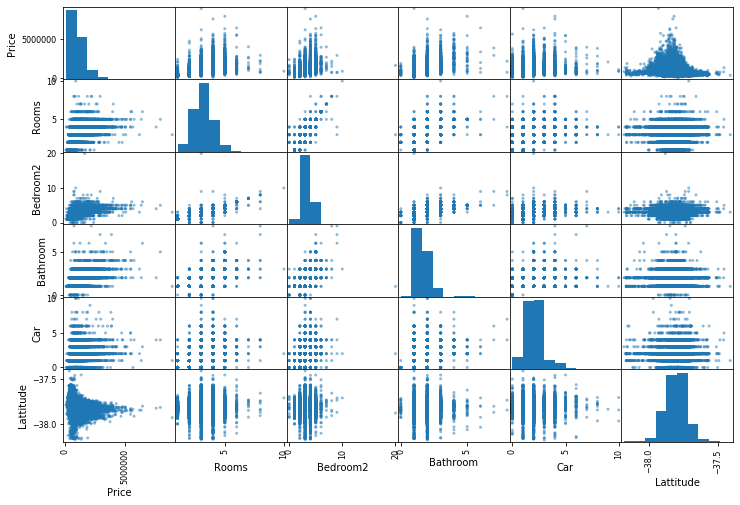

In [56]:
from pandas.plotting import scatter_matrix
attributes = ['Price','Rooms', 'Bedroom2', 'Bathroom', 'Car','Lattitude']
scatter_matrix(df[attributes], figsize = (12, 8))

In [64]:
X_train.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Price
5557,2,2.1,2,1,1.0,0,78.0,-37.8308,144.9694,Southern Metropolitan,561000
365,3,5.9,3,1,1.0,452,175.0,-37.7762,144.9174,Western Metropolitan,1215000
6847,2,1.8,2,1,1.0,0,NaN,-37.7985,144.9745,Northern Metropolitan,585000
4916,3,8.8,3,2,1.0,369,NaN,-37.7389,144.9821,Northern Metropolitan,1080000
354,2,5.9,2,1,3.0,252,108.0,-37.7825,144.9206,Western Metropolitan,705000


In [65]:
y_train.head()

5557    Southern Metropolitan
365      Western Metropolitan
6847    Northern Metropolitan
4916    Northern Metropolitan
354      Western Metropolitan
Name: Regionname, dtype: object

In [66]:
train_set = X_train    # X_train.head()   train_set.head()

In [67]:
# split feature and class
data = train_set.drop('Price', axis = 1) 

In [70]:
data.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname
5557,2,2.1,2,1,1.0,0,78.0,-37.8308,144.9694,Southern Metropolitan
365,3,5.9,3,1,1.0,452,175.0,-37.7762,144.9174,Western Metropolitan
6847,2,1.8,2,1,1.0,0,NaN,-37.7985,144.9745,Northern Metropolitan
4916,3,8.8,3,2,1.0,369,NaN,-37.7389,144.9821,Northern Metropolitan
354,2,5.9,2,1,3.0,252,108.0,-37.7825,144.9206,Western Metropolitan


In [71]:
labels = train_set['Price'].copy()
labels.head()

5557     561000
365     1215000
6847     585000
4916    1080000
354      705000
Name: Price, dtype: int64

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
train_set_numeric = data.drop('Regionname', axis = 1) 
imputer.fit(train_set_numeric)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [73]:
X = imputer.transform(train_set_numeric)
hdata_transimit = pd.DataFrame(X, columns=train_set_numeric.columns, index = train_set_numeric.index)

In [75]:
hdata_transimit.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 5557 to 3616
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         10864 non-null  float64
 1   Distance      10864 non-null  float64
 2   Bedroom2      10864 non-null  float64
 3   Bathroom      10864 non-null  float64
 4   Car           10864 non-null  float64
 5   Landsize      10864 non-null  float64
 6   BuildingArea  10864 non-null  float64
 7   Lattitude     10864 non-null  float64
 8   Longtitude    10864 non-null  float64
dtypes: float64(9)
memory usage: 848.8 KB


In [76]:
train_set_norminal = train_set[['Regionname']]
train_set_norminal.head(10)

,Regionname
5557,Southern Metropolitan
365,Western Metropolitan
6847,Northern Metropolitan
4916,Northern Metropolitan
354,Western Metropolitan
4749,Southern Metropolitan
11687,Eastern Metropolitan
7169,Southern Metropolitan
410,Southern Metropolitan
7348,Southern Metropolitan


In [77]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_set_encoding = cat_encoder.fit_transform(train_set_norminal)
train_set_encoding

<10864x8 sparse matrix of type '<class 'numpy.float64'>'
	with 10864 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standard_scaler', StandardScaler()),
])
hdata_num_transmit = pipeline.fit_transform(train_set_numeric)

In [79]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_set_numeric)
cat_attribs = ['Regionname']

final_pipeline = ColumnTransformer([
    ('number', pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

data_prepared = final_pipeline.fit_transform(data)

In [80]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(data_prepared, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
t_data = data.iloc[:5]
t_labels = labels.iloc[:5]

In [82]:
t_data_prepared = full_pipeline.transform(t_data)
print('Predictions:', linear_reg.predict(t_data_prepared))
print('Labels:', list(t_labels))

Predictions: [1186217.38450449  969057.29407308  893945.61491174  999496.6559992
  768379.20510387]
Labels: [561000, 1215000, 585000, 1080000, 705000]


In [83]:
from sklearn.metrics import mean_squared_error
housing_price_predictions = linear_reg.predict(data_prepared)
linear_mean_squared_error = mean_squared_error(labels, housing_price_predictions)
linear_root_mean_squared_error = np.sqrt(linear_mean_squared_error)
linear_root_mean_squared_error

445070.18167343416

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared, labels)

housing_price_predictions = tree_regressor.predict(data_prepared)
tree_mean_squared_error = mean_squared_error(labels, housing_price_predictions)
tree_root_mean_squared_error = np.sqrt(tree_mean_squared_error)
tree_root_mean_squared_error

4929.776856747874

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor, data_prepared, labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [86]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('STD deviation:', scores.std())
     
display_scores(tree_rmse_scores)  

Scores: [453726.82197056 476294.78043927 395823.48716074 507275.95778862
 412877.29667027 382148.43832755 467499.59331004 375980.21057021
 406223.76239833 400734.40007355]
Mean: 427858.4748709132
STD deviation: 42578.1822601336
